In [42]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from scipy.optimize import curve_fit
from scipy.stats import linregress

In [2]:
plt.rcParams.update({'font.size': 20})
plt.rcParams.update({'lines.linewidth': 2})

In [3]:
def findCritPt(depth_l,cmi_ave):
    mid_pt = np.max(cmi_ave)/2
    mid_idx = np.argmin(np.abs(cmi_ave-mid_pt))
    # print(mid_idx)
    return depth_l[mid_idx] - cmi_ave[mid_idx]*(depth_l[mid_idx+1]-depth_l[mid_idx-1])/(cmi_ave[mid_idx+1]-cmi_ave[mid_idx-1])
    # return depth_l[mid_idx]

In [4]:
def findCritSlope(depth_l,cmi_ave):
    mid_pt = np.max(cmi_ave)/2
    mid_idx = np.argmin(np.abs(cmi_ave-mid_pt))
    # print(mid_idx)
    return (cmi_ave[mid_idx+1]-cmi_ave[mid_idx-1])/(depth_l[mid_idx+1]-depth_l[mid_idx-1])
    # return depth_l[mid_idx]

### BW Nmeas Depth
look for critical point & scaling with B sites

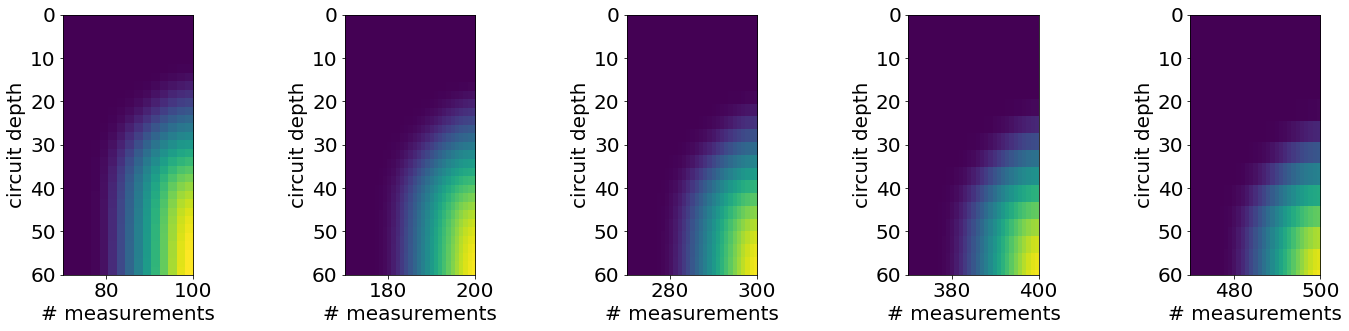

In [12]:
file_name_l = [
    "data/230226/230226_nd1_pp.npz",
    "data/230313/230313_nd1_pp.npz",
    "data/230313/230313_nd2_pp.npz",
    "data/230313/230313_nd3_pp.npz",
    "data/230313/230313_nd4_pp.npz"
]

plt.rcParams["figure.figsize"] = (20,5)
for i, file_name in enumerate(file_name_l):
    raw = np.load(file_name)
    n_meas_l  = raw['n_meas_l']
    depth_l  = raw['depth_l']
    cmi_ave_l = raw['cmi_ave_l']
    cmi_std_l = raw['cmi_std_l']

    plt.subplot(1,5,i+1)
    # plt.rcParams["figure.figsize"] = (6,5)
    plt.imshow(cmi_ave_l,extent=[n_meas_l[0],n_meas_l[-1],depth_l[-1],depth_l[0]])
    plt.xlim([n_meas_l[-1]-30,n_meas_l[-1]])
    plt.ylim([60,0])
    plt.xlabel("# measurements")
    plt.ylabel("circuit depth")
plt.tight_layout()

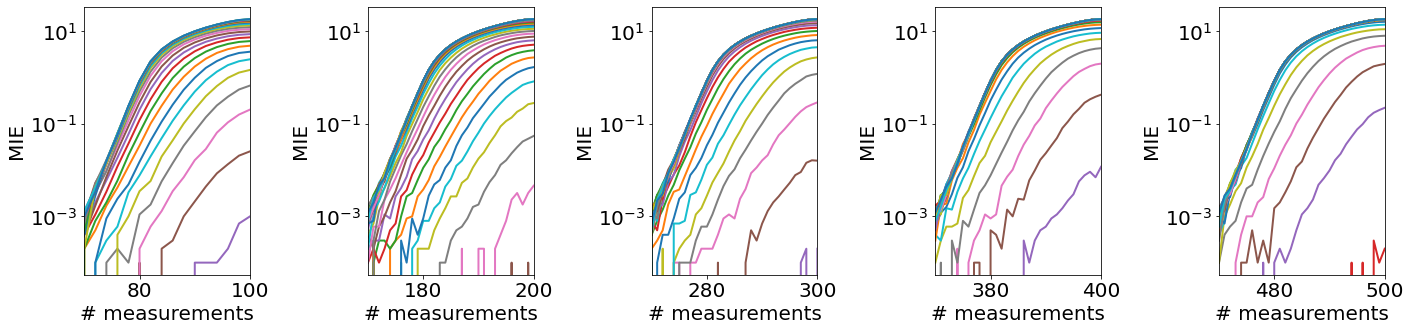

In [18]:
file_name_l = [
    "data/230226/230226_nd1_pp.npz",
    "data/230313/230313_nd1_pp.npz",
    "data/230313/230313_nd2_pp.npz",
    "data/230313/230313_nd3_pp.npz",
    "data/230313/230313_nd4_pp.npz"
]

plt.rcParams["figure.figsize"] = (20,5)
for i, file_name in enumerate(file_name_l):
    raw = np.load(file_name)
    n_meas_l  = raw['n_meas_l']
    depth_l  = raw['depth_l']
    cmi_ave_l = raw['cmi_ave_l']
    cmi_std_l = raw['cmi_std_l']
    
    # if i == 1:
    #     range_end = 30
    # else:
    #     range_end = len(depth_l)
    range_end = len(depth_l)

    plt.subplot(1,5,i+1)
    for j in range(0,range_end,1):
        plt.plot(n_meas_l,cmi_ave_l[j,:])
    plt.yscale('log')

    plt.rcParams["figure.figsize"] = (6,5)
    plt.xlim([n_meas_l[-1]-30,n_meas_l[-1]])
    plt.xlabel("# measurements")
    plt.ylabel("MIE")
plt.tight_layout()

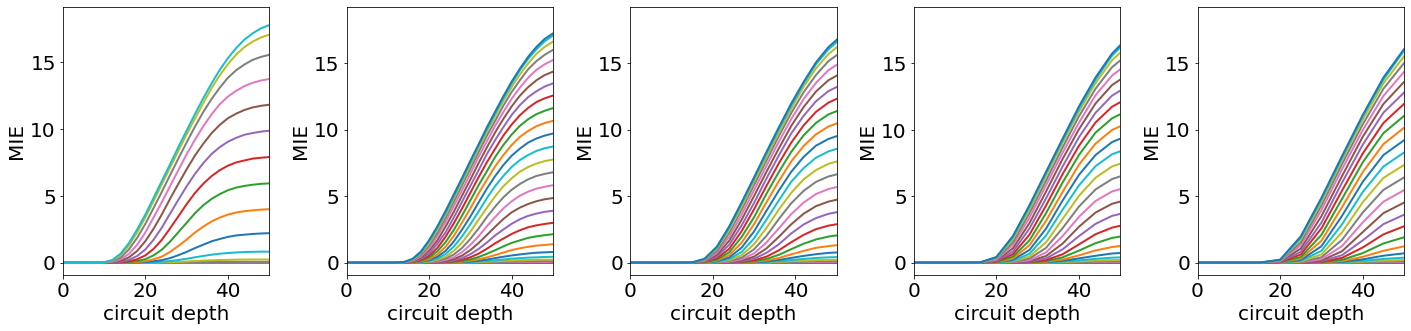

In [21]:
file_name_l = [
    "data/230226/230226_nd1_pp.npz",
    "data/230313/230313_nd1_pp.npz",
    "data/230313/230313_nd2_pp.npz",
    "data/230313/230313_nd3_pp.npz",
    "data/230313/230313_nd4_pp.npz"
]

plt.rcParams["figure.figsize"] = (20,5)
for i, file_name in enumerate(file_name_l):
    raw = np.load(file_name)
    n_meas_l  = raw['n_meas_l']
    depth_l  = raw['depth_l']
    cmi_ave_l = raw['cmi_ave_l']
    cmi_std_l = raw['cmi_std_l']

    range_end = len(n_meas_l)

    plt.subplot(1,5,i+1)
    for i in range(0,range_end,1):
        plt.plot(depth_l,cmi_ave_l[:,i])
    # plt.yscale('log')
    plt.rcParams["figure.figsize"] = (6,5)
    plt.xlim([0,50])
    # plt.ylim([0,40])
    plt.xlabel("circuit depth")
    plt.ylabel("MIE")
plt.tight_layout()

In [6]:
def findCritPt(depth_l,cmi_ave):
    mid_pt = np.max(cmi_ave)/2
    mid_idx = np.argmin(np.abs(cmi_ave-mid_pt))
    # print(mid_idx)
    return depth_l[mid_idx] - cmi_ave[mid_idx]*(depth_l[mid_idx+1]-depth_l[mid_idx-1])/(cmi_ave[mid_idx+1]-cmi_ave[mid_idx-1])
    # return depth_l[mid_idx]

In [7]:
def findCritSlope(depth_l,cmi_ave):
    mid_pt = np.max(cmi_ave)/2
    mid_idx = np.argmin(np.abs(cmi_ave-mid_pt))
    # print(mid_idx)
    return (cmi_ave[mid_idx+1]-cmi_ave[mid_idx-1])/(depth_l[mid_idx+1]-depth_l[mid_idx-1])
    # return depth_l[mid_idx]

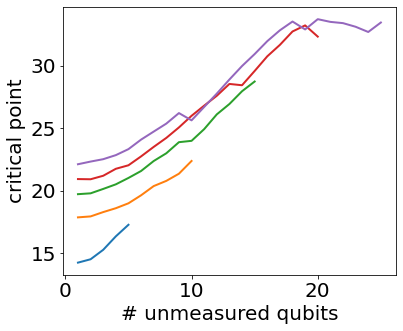

In [31]:
file_name_l = [
    "data/230226/230226_nd1_pp.npz",
    "data/230313/230313_nd1_pp.npz",
    "data/230313/230313_nd2_pp.npz",
    "data/230313/230313_nd3_pp.npz",
    "data/230313/230313_nd4_pp.npz"
]

plt.rcParams["figure.figsize"] = (6,5)
for i, file_name in enumerate(file_name_l):
    raw = np.load(file_name)
    n_meas_l  = raw['n_meas_l']
    depth_l  = raw['depth_l']
    cmi_ave_l = raw['cmi_ave_l']
    cmi_std_l = raw['cmi_std_l']


    range_end = len(n_meas_l)

    # plt.subplot(1,5,i+1)
    nmeas_cutoff = 5*i+5
    critPt = np.zeros((nmeas_cutoff,))
    for j in range(range_end-nmeas_cutoff,range_end,1):
        critPt[j-(range_end-nmeas_cutoff)] = findCritPt(depth_l,cmi_ave_l[:,j])
    plt.plot(np.arange(1,nmeas_cutoff+1),critPt[::-1])
    # plt.yscale('log')
    plt.rcParams["figure.figsize"] = (6,5)
    # plt.xlim([0,60])
    plt.xlabel("# unmeasured qubits")
    plt.ylabel("critical point")
plt.tight_layout()

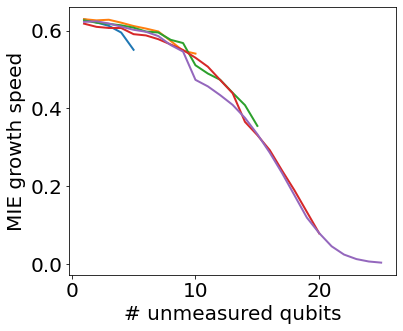

In [32]:
file_name_l = [
    "data/230226/230226_nd1_pp.npz",
    "data/230313/230313_nd1_pp.npz",
    "data/230313/230313_nd2_pp.npz",
    "data/230313/230313_nd3_pp.npz",
    "data/230313/230313_nd4_pp.npz"
]

plt.rcParams["figure.figsize"] = (6,5)
for i, file_name in enumerate(file_name_l):
    raw = np.load(file_name)
    n_meas_l  = raw['n_meas_l']
    depth_l  = raw['depth_l']
    cmi_ave_l = raw['cmi_ave_l']
    cmi_std_l = raw['cmi_std_l']


    range_end = len(n_meas_l)

    # plt.subplot(1,5,i+1)
    nmeas_cutoff = 5*i+5
    critPt = np.zeros((nmeas_cutoff,))
    for j in range(range_end-nmeas_cutoff,range_end,1):
        critPt[j-(range_end-nmeas_cutoff)] = findCritSlope(depth_l,cmi_ave_l[:,j])
    plt.plot(np.arange(1,nmeas_cutoff+1),critPt[::-1])
    # plt.yscale('log')
    plt.rcParams["figure.figsize"] = (6,5)
    # plt.xlim([0,60])
    plt.xlabel("# unmeasured qubits")
    plt.ylabel("MIE growth speed")
plt.tight_layout()

perform scaling analysis

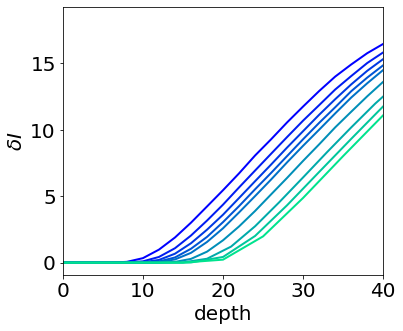

In [34]:
file_name_l = [
    "../data/230305/230305_nd4_pp.npz",
    "../data/230305/230305_nd5_pp.npz",
    "../data/230226/230226_nd1_pp.npz",
    "../data/230305/230305_nd6_pp.npz",
    "../data/230305/230305_nd7_pp.npz",

    "../data/230313/230313_nd1_pp.npz",
    "../data/230313/230313_nd2_pp.npz",
    "../data/230313/230313_nd3_pp.npz",
    "../data/230313/230313_nd4_pp.npz"
]

N_l = [60,80,100,120,140,200,300,400,500]
# N_l = [60,80,100,200,300,400,500]

ax = plt.subplot()
cmap = mpl.colormaps['winter']

plt.rcParams["figure.figsize"] = (6,5)
plt.xlim([0,40])
plt.xlabel("depth")
plt.ylabel("$\delta I$")
for i, file_name in enumerate(file_name_l):
    raw = np.load(file_name)
    n_meas_l  = raw['n_meas_l']
    depth_l  = raw['depth_l']
    cmi_ave_l = raw['cmi_ave_l']
    cmi_std_l = raw['cmi_std_l']

    range_end = len(n_meas_l)
    
    n_umeas = 0

    if i > 4:
        plt.plot(depth_l,cmi_ave_l[:,-2*(n_umeas)-1],c=cmap((i)/len(N_l)))
    else:
        plt.plot(depth_l,cmi_ave_l[:,-(n_umeas)-1],c=cmap((i)/len(N_l))) 

    # plt.yscale('log')
    # plt.ylim([0,40])
plt.tight_layout()

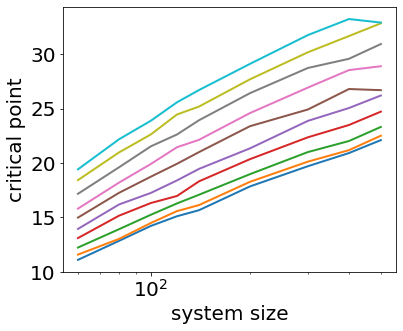

In [7]:
file_name_l = [
    "../data/230305/230305_nd4_pp.npz",
    "../data/230305/230305_nd5_pp.npz",
    "../data/230226/230226_nd1_pp.npz",
    "../data/230305/230305_nd6_pp.npz",
    "../data/230305/230305_nd7_pp.npz",

    "../data/230313/230313_nd1_pp.npz",
    "../data/230313/230313_nd2_pp.npz",
    "../data/230313/230313_nd3_pp.npz",
    "../data/230313/230313_nd4_pp.npz"
]

N_l = [60,80,100,120,140,200,300,400,500]
n_umeas_end = 10
critPt_l = np.zeros((len(N_l),n_umeas_end))

plt.rcParams["figure.figsize"] = (6,5)
for i, file_name in enumerate(file_name_l):
    raw = np.load(file_name)
    n_meas_l  = raw['n_meas_l']
    depth_l  = raw['depth_l']
    cmi_ave_l = raw['cmi_ave_l']
    cmi_std_l = raw['cmi_std_l']

    for n_umeas in range(n_umeas_end):
        j = n_umeas
        if i > 4:
            critPt_l[i,j] = findCritPt(depth_l,cmi_ave_l[:,-2*(n_umeas)-1])
        else:
            critPt_l[i,j] = findCritPt(depth_l,cmi_ave_l[:,-(n_umeas)-1]) 

for j in range(n_umeas_end):
    plt.plot(N_l,critPt_l[:,j])
    
plt.xscale('log')
plt.rcParams["figure.figsize"] = (6,5)
# plt.xlim([0,50])
# plt.ylim([0,40])
plt.xlabel("system size")
plt.ylabel("critical point")
plt.tight_layout()

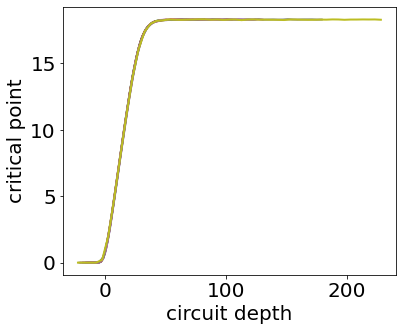

In [36]:
file_name_l = [
    "../data/230305/230305_nd4_pp.npz",
    "../data/230305/230305_nd5_pp.npz",
    "../data/230226/230226_nd1_pp.npz",
    "../data/230305/230305_nd6_pp.npz",
    "../data/230305/230305_nd7_pp.npz",

    "../data/230313/230313_nd1_pp.npz",
    "../data/230313/230313_nd2_pp.npz",
    "../data/230313/230313_nd3_pp.npz",
    "../data/230313/230313_nd4_pp.npz"
]

N_l = [60,80,100,120,140,200,300,400,500]
critPt_l = np.zeros(len(N_l))

plt.rcParams["figure.figsize"] = (6,5)
for i, file_name in enumerate(file_name_l):
    raw = np.load(file_name)
    n_meas_l  = raw['n_meas_l']
    depth_l  = raw['depth_l']
    cmi_ave_l = raw['cmi_ave_l']
    cmi_std_l = raw['cmi_std_l']

    n_umeas = 0
    if i > 4:
        critPt_l[i] = findCritPt(depth_l,cmi_ave_l[:,-2*(n_umeas)-1])
        plt.plot(depth_l-critPt_l[i],cmi_ave_l[:,-2*(n_umeas)-1])
    else:
        critPt_l[i] = findCritPt(depth_l,cmi_ave_l[:,-(n_umeas)-1])
        plt.plot(depth_l-critPt_l[i],cmi_ave_l[:,-(n_umeas)-1]) 


# plt.plot(N_l,critPt_l)
# plt.xscale('log')
plt.rcParams["figure.figsize"] = (6,5)
# plt.xlim([0,50])
# plt.ylim([0,40])
plt.xlabel("circuit depth")
plt.ylabel("critical point")
plt.tight_layout()

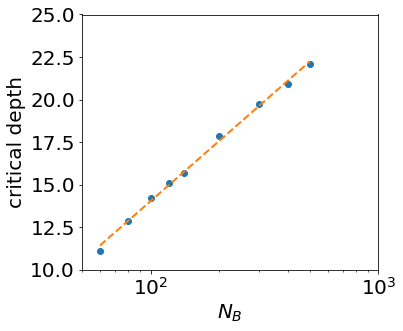

In [43]:
def fit_log(x,A,b):
    return A*np.log(x)+b

popt, pcov = curve_fit(fit_log,N_l,critPt_l)

plt.rcParams["figure.figsize"] = (6,5)
plt.plot(N_l,critPt_l,"o")
plt.plot(N_l,fit_log(N_l,*popt),"--")
plt.xscale('log')
plt.xlim([50,1000])
plt.ylim([10,25])
plt.xlabel('$N_B$')
plt.ylabel('critical depth')
plt.tight_layout()

finite size scaling

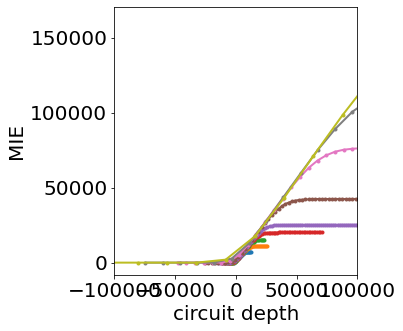

In [138]:
file_name_l = [
    "data/230305/230305_nd4_pp.npz",
    "data/230305/230305_nd5_pp.npz",
    "data/230226/230226_nd1_pp.npz",
    "data/230305/230305_nd6_pp.npz",
    "data/230305/230305_nd7_pp.npz",

    "data/230313/230313_nd1_pp.npz",
    "data/230313/230313_nd2_pp.npz",
    "data/230313/230313_nd3_pp.npz",
    "data/230313/230313_nd4_pp.npz"
]

N_l = [60,80,100,120,140,200,300,400,500]
# N_l = [200,300,400,500]


plt.rcParams["figure.figsize"] = (6,5)
for i, file_name in enumerate(file_name_l):
    raw = np.load(file_name)
    n_meas_l  = raw['n_meas_l']
    depth_l  = raw['depth_l']
    cmi_ave_l = raw['cmi_ave_l']
    cmi_std_l = raw['cmi_std_l']

    range_end = len(n_meas_l)
    
    n_umeas = 0
    
    beta = 0.536
    nu = 0.733
    tc = 3.5*np.log(N_l[i])

    if i > 4:
        # temp = 1
        plt.plot((depth_l-tc)*(N_l[i]**(1/nu)),cmi_ave_l[:,-2*(n_umeas)-1]*(N_l[i]**(2*beta/nu)),'.-')
    else:
        plt.plot((depth_l-tc)*(N_l[i]**(1/nu)),cmi_ave_l[:,-(n_umeas)-1]*(N_l[i]**(2*beta/nu)),'.-')

    # plt.yscale('log')
    plt.rcParams["figure.figsize"] = (6,5)
    plt.xlim([-100000,100000])
    # plt.ylim([0,20000])
    plt.xlabel("circuit depth")
    plt.ylabel("MIE")
plt.tight_layout()

In [ ]:
file_name_l = [
    # "data/230305/230305_nd4_pp.npz",
    # "data/230305/230305_nd5_pp.npz",
    "data/230226/230226_nd1_pp.npz",
    # "data/230305/230305_nd6_pp.npz",
    # "data/230305/230305_nd7_pp.npz",

    "data/230313/230313_nd1_pp.npz",
    "data/230313/230313_nd2_pp.npz",
    "data/230313/230313_nd3_pp.npz",
    "data/230313/230313_nd4_pp.npz"
]

# N_l = [60,80,100,120,140,200,300,400,500]
N_l = [100,200,300,400,500]


plt.rcParams["figure.figsize"] = (6,5)

# use the biggest state as reference
raw = np.load(file_name[-1])
n_meas_ref  = raw['n_meas_l']
depth_ref  = raw['depth_l']
cmi_ave_ref = raw['cmi_ave_l']
cmi_std_ref = raw['cmi_std_l']
sdepth_ref = (depth_ref-tc)*(N_l[-1]**(1/nu)) 

for i, file_name in enumerate(file_name_l[0:-1]):
    raw = np.load(file_name)
    n_meas_l  = raw['n_meas_l']
    depth_l  = raw['depth_l']
    cmi_ave_l = raw['cmi_ave_l']
    cmi_std_l = raw['cmi_std_l']
    
    n_umeas = int(0/2)
    
    # beta = 0.536
    # nu = 0.733
    # tc = 3.5*np.log(N_l[i])
    

    if i > 0:
        # temp = 1
        plt.plot((depth_l-tc)*(N_l[i]**(1/nu)),cmi_ave_l[:,-2*(n_umeas)-1]*(N_l[i]**(2*beta/nu)),'.-')
    else:
        plt.plot((depth_l-tc)*(N_l[i]**(1/nu)),cmi_ave_l[:,-(n_umeas)-1]*(N_l[i]**(2*beta/nu)),'.-')